In [1]:
import election_analysis as ea
import pickle
import pandas as pd
import geopandas as gp
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [131]:
#Simplified loading of data, directly from ACS csv files instead of reading Excel files from the Fed

def loadACS_CSV(filename):
    data = pd.read_csv(filename, encoding='latin1', low_memory=False)
    data.columns = data.iloc[0]
    data = data.drop(0)
    data = data.set_index('Id2')
    data.index.name = 'FIPS'
    data = data.drop('Id',axis=1)
    data = data.rename({'Geography':'County Name'}, axis =1 )
    return data

demographicsFilename = 'data_spreadsheets/ACS_16_5YR_Demographics/ACS_16_5YR_DP05_with_ann.csv'
economicsFilename = 'data_spreadsheets/ACS_16_5YR_Economic_Indicators/ACS_16_5YR_DP03_with_ann.csv'
socialFilename = 'data_spreadsheets/ACS_16_5YR_Social_Characteristics/ACS_16_5YR_DP02_with_ann.csv'

#Load Census data from CSV files
demographics = loadACS_CSV(demographicsFilename)
economics = loadACS_CSV(economicsFilename)
social = loadACS_CSV(socialFilename)

#Drug Poisoning data

#Climate change data

#Voting data



#Get county shape information from shapefile
countyShapes = gp.read_file('cb_2015_us_county_5m/cb_2015_us_county_5m.shp')
countyShapes = countyShapes.set_index('GEOID')
countyShapes.index.name='FIPS'
countyShapes = countyShapes.sort_index()

#Merge all the data into a master GeoDataFrame, called 'usa'
usa = countyShapes.merge(demographics.merge(economics, left_index=True, right_index=True).merge(social, left_index=True, right_index=True), left_index=True, right_index=True)

In [152]:
countyShapes.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'NAME', 'LSAD', 'ALAND',
       'AWATER', 'geometry'],
      dtype='object')

In [150]:
def countyPlot(df, column,cmap='inferno',vmin=None,vmax=None,cLabel=None):
    """
    Takes a GeoPandas DataFrame df, and plots 'column' in a nice way
    """
    plotDF = gp.GeoDataFrame(df[column],geometry=df['geometry'])
    lambertStringMainland = '+proj=lcc +lat_1=20 +lat_2=60 +lat_0=39 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'
    lambertStringAlaska = '+proj=lcc +lat_1=20 +lat_2=60 +lat_0=40.5 +lon_0=-156 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'
    lambertStringHawaii = '+proj=lcc +lat_1=20 +lat_2=60 +lat_0=20.5 +lon_0=-157 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'

    fig = plt.figure(figsize=[20,10])
    
    #If color limits aren't explicitly set, they get set to the min/max of the data
    if not vmin:
        vmin = float(np.min(plotDF[column].values))
        vmax = float(np.max(plotDF[column].values))
        
    #Mainland
    ax = plt.axes([0.0,0.0,1.0,1.0], projection=ccrs.LambertConformal(), frameon=False)
    ax.set_extent([-125.0, -74., 21.,52.])
    plotDF.to_crs(lambertStringMainland).plot(color='grey',ax=ax)
    plotDF.dropna().to_crs(lambertStringMainland).plot(column=column, cmap=cmap,ax=ax,vmin=vmin, vmax=vmax)

    #Alaska
    ax2 = plt.axes([0.0, 0.0, 0.43, 0.43],projection=ccrs.LambertConformal(central_latitude = 40.5, central_longitude = -156.), frameon=False)
    ax2.set_extent([180.0,-132., 45.,72])

    plotDF.to_crs(lambertStringAlaska).plot(color='grey',ax=ax2)
    plotDF.dropna().to_crs(lambertStringAlaska).plot(column=column, cmap=cmap,ax=ax2,vmin=vmin, vmax=vmax)

    #Hawaii
    ax3 = plt.axes([0.25, 0.0, 0.3, 0.2],projection=ccrs.LambertConformal(central_longitude=-157.0, central_latitude=20.5), frameon=False)
    ax3.set_extent([-162.0,-154., 18.,23.])
    plotDF.to_crs(lambertStringHawaii).plot(color='grey',ax=ax3)
    plotDF.dropna().to_crs(lambertStringHawaii).plot(column=column, cmap=cmap,ax=ax3,vmin=vmin, vmax=vmax)
    
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    ax2.background_patch.set_visible(False)
    ax2.outline_patch.set_visible(False)
    ax3.background_patch.set_visible(False)
    ax3.outline_patch.set_visible(False)

    if cLabel:
        axc = plt.axes([0.25, 0.92, 0.5, 0.015], frameon=False)
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        numTicks = 9
        cbarStep=100.*float((vmax-vmin)/(numTicks-1.0))
        cb = mpl.colorbar.ColorbarBase(axc, ticks=np.linspace(vmin, vmax, numTicks),cmap=cmap,norm=norm,orientation='horizontal')
        cb.set_ticklabels(['{:.0f}%'.format(x) for x in np.arange(100.*vmin, 100.*vmax+cbarStep, cbarStep)])
        cb.ax.xaxis.set_ticks_position('top')
        cb.set_label(cLabel, fontdict = {'horizontalalignment' : 'center', 'fontsize':14})


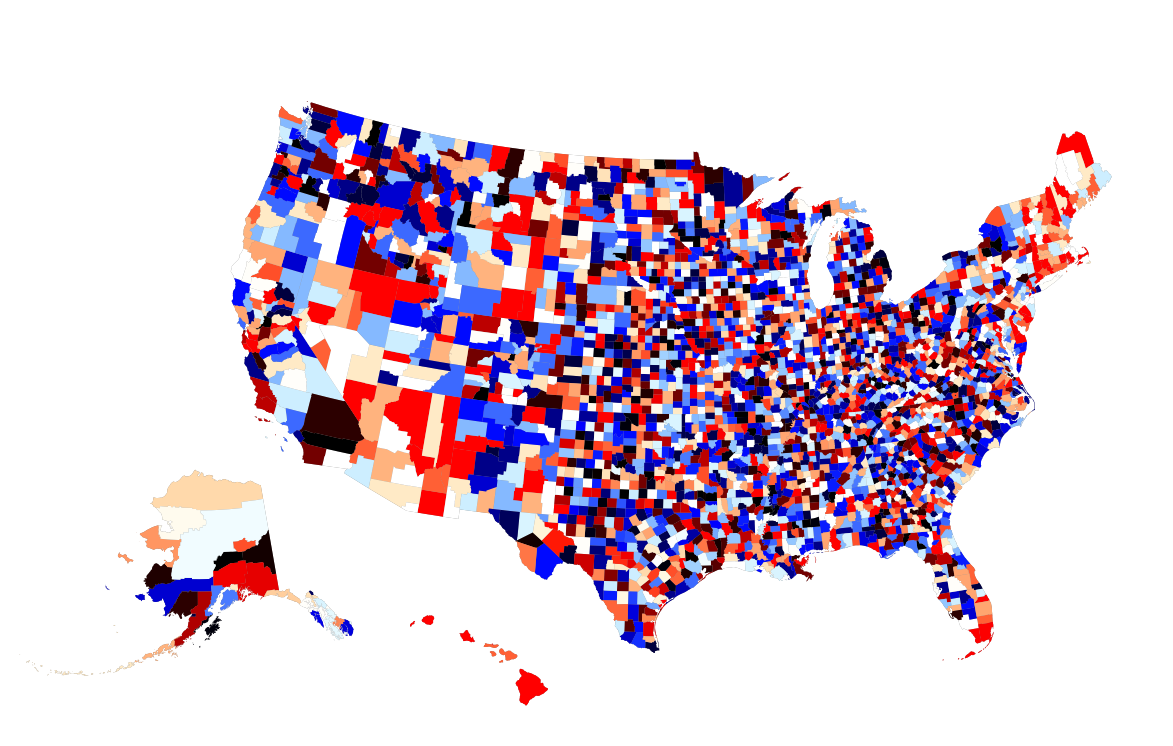

In [155]:
countyPlot(usa, 'COUNTYFP',cmap='flag',cLabel=None)

In [3]:
#Are Georgia's 2016 election results anomalous?
analysis.data[0:70]

GOPChange   GOP2016   GOP2012  Turnout2012  Turnout2016  VotesDem2016  \
1001   0.027680  0.754018  0.726337     0.431061     0.433413        5908.0   
1003   0.024225  0.798123  0.773897     0.441700     0.437225       18409.0   
1005   0.044983  0.528359  0.483376     0.420610     0.395879        4848.0   
1007   0.051606  0.782270  0.730664     0.367896     0.380117        1874.0   
1009   0.048926  0.913855  0.864929     0.410268     0.432518        2150.0   
1011   0.008899  0.243949  0.235051     0.498217     0.450589        3530.0   
1013   0.032457  0.568258  0.535801     0.457198     0.430393        3716.0   
1015   0.058437  0.713109  0.654671     0.390519     0.401358       13197.0   
1017   0.053556  0.575188  0.521632     0.423923     0.400851        5763.0   
1019   0.084762  0.852511  0.767749     0.369758     0.401672        1524.0   
1021   0.040316  0.838182  0.797866     0.395967     0.409117        2909.0   
1023   0.047824  0.568853  0.521030     0.585652     0.554991        3109.0   
1025   0.014740  0.554481  0.539741     0.547956     0.525623        5712.0   
1027   0.085904  0.809097  0.723193     0.488225     0.479099        1234.0   
1029   0.057407  0.893491  0.836084     0.418006     0.430314         684.0   
1031   0.048019  0.790499  0.742480     0.381731     0.390798        4194.0   
1033   0.100173  0.696177  0.596004     0.423742     0.442932        7296.0   
1035   0.036873  0.526535  0.489662     0.537019     0.522953        3069.0   
1037   0.077239  0.654771  0.577532     0.465673     0.487289        1780.0   
1039   0.059446  0.847510  0.788064     0.404392     0.416493        2379.0   
1041   0.055867  0.730645  0.674778     0.457902     0.443758        1663.0   
1043   0.055884  0.897707  0.841823     0.408022     0.442143        3730.0   
1045   0.051451  0.757882  0.706431     0.365596     0.369845        4408.0   
1047   0.010648  0.310801  0.300153     0.488514     0.465157       12826.0   
1049   0.087163  0.855387  0.768224     0.331887     0.359111        3682.0   
1051   0.026097  0.766024  0.739927     0.437944     0.440776        8436.0   
1053   0.061854  0.686382  0.624528     0.387226     0.397053        4698.0   
1055   0.071453  0.756367  0.684914     0.401996     0.414200       10350.0   
1057   0.068937  0.831576  0.762639     0.461924     0.487308        1358.0   
1059   0.114785  0.811627  0.696841     0.339252     0.368756        2197.0   
...         ...       ...       ...          ...          ...           ...   
1081   0.028064  0.620543  0.592479     0.359676     0.347869       20987.0   
1083   0.041744  0.755267  0.713523     0.401428     0.411458        9340.0   
1085   0.030707  0.263983  0.233276     0.692293     0.640375        4882.0   
1087   0.034212  0.161511  0.127299     0.502472     0.455150        7237.0   
1089   0.001834  0.588252  0.586418     0.444845     0.424784       62435.0   
1091   0.019985  0.482319  0.462334     0.561097     0.550552        5607.0   
1093   0.086231  0.887288  0.801058     0.391383     0.423528        1432.0   
1095   0.061566  0.856050  0.794485     0.340362     0.358670        4913.0   
1097   0.028128  0.571021  0.542893     0.418076     0.384528       68429.0   
1099   0.035946  0.572463  0.536517     0.470367     0.468230        4310.0   
1101  -0.009726  0.366405  0.376131     0.442818     0.409090       58669.0   
1103   0.051564  0.769256  0.717692     0.405501     0.408429       11216.0   
1105   0.020485  0.268465  0.247980     0.593087     0.545853        3823.0   
1107   0.045328  0.578612  0.533285     0.494189     0.463787        3972.0   
1109   0.039080  0.603852  0.564772     0.421224     0.382143        5039.0   
1111   0.075966  0.770702  0.694736     0.455068     0.440888        2290.0   
1113   0.051676  0.490233  0.438557     0.325738     0.322956        9577.0   
1115   0.024400  0.850521  0.826122     0.408498     0.421829        5550.0   
1117  -0.012056  0.760611  0.772667     0.454143     0.4

file = open('database.pk1','wb')
pickle.dump(result, file)
file.close()

In [308]:
file = open('database.pk1','rb')
result = pickle.load(file)
file.close()

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    display(usa[usa.isnull().any(axis=1)])

GOPChange   GOP2016   GOP2012  Turnout2012  Turnout2016  VotesDem2016  \
2013         NaN       NaN       NaN          NaN          NaN           NaN   
2016         NaN       NaN       NaN          NaN          NaN           NaN   
2020         NaN       NaN       NaN          NaN          NaN           NaN   
2050         NaN       NaN       NaN          NaN          NaN           NaN   
2060         NaN       NaN       NaN          NaN          NaN           NaN   
2068         NaN       NaN       NaN          NaN          NaN           NaN   
2070         NaN       NaN       NaN          NaN          NaN           NaN   
2090         NaN       NaN       NaN          NaN          NaN           NaN   
2100         NaN       NaN       NaN          NaN          NaN           NaN   
2105         NaN       NaN       NaN          NaN          NaN           NaN   
2110         NaN       NaN       NaN          NaN          NaN           NaN   
2122         NaN       NaN       NaN          NaN          NaN           NaN   
2130         NaN       NaN       NaN          NaN          NaN           NaN   
2150         NaN       NaN       NaN          NaN          NaN           NaN   
2158         NaN       NaN       NaN          NaN          NaN           NaN   
2164         NaN       NaN       NaN          NaN          NaN           NaN   
2170         NaN       NaN       NaN          NaN          NaN           NaN   
2180         NaN       NaN       NaN          NaN          NaN           NaN   
2185         NaN       NaN       NaN          NaN          NaN           NaN   
2188         NaN       NaN       NaN          NaN          NaN           NaN   
2195         NaN       NaN       NaN          NaN          NaN           NaN   
2198         NaN       NaN       NaN          NaN          NaN           NaN   
2201         NaN       NaN       NaN          NaN          NaN           NaN   
2220         NaN       NaN       NaN          NaN          NaN           NaN   
2230         NaN       NaN       NaN          NaN          NaN           NaN   
2231         NaN       NaN       NaN          NaN          NaN           NaN   
2232         NaN       NaN       NaN          NaN          NaN           NaN   
2240         NaN       NaN       NaN          NaN          NaN           NaN   
2261         NaN       NaN       NaN          NaN          NaN           NaN   
2270         NaN       NaN       NaN          NaN          NaN           NaN   
2275         NaN       NaN       NaN          NaN          NaN           NaN   
2280         NaN       NaN       NaN          NaN          NaN           NaN   
2282         NaN       NaN       NaN          NaN          NaN           NaN   
2290         NaN       NaN       NaN          NaN          NaN           NaN   
6075   -0.033447  0.099422  0.132869     0.374644     0.398371      312443.0   
8014   -0.036445  0.422224  0.458669          NaN          NaN       19530.0   
11001  -0.028734  0.042509  0.071244          NaN          NaN      260223.0   
15003   0.041673  0.339548  0.297875     0.296194     0.267911      175634.0   
15005        NaN       NaN       NaN          NaN          NaN           NaN   
30113        NaN       NaN       NaN          NaN          NaN           NaN   
42101   0.017780  0.158295  0.140515     0.418520     0.424754      560542.0   
46102        NaN       NaN       NaN          NaN          NaN           NaN   
46103        NaN       NaN       NaN          NaN          NaN           NaN   
46105        NaN       NaN       NaN          NaN          NaN           NaN   
46109        NaN       NaN       NaN          NaN          NaN           NaN   
46111        NaN       NaN       NaN          NaN          NaN           NaN   
46113   0.027732  0.087796  0.060064     1.337634     1.145659        2504.0   
48033   0.019100  0.914127  0.895028     0.580750     0.570300          31.0   
48261  -0.040984  0.459016  0.500000     0.375000     0.452970          99.0   
48269  